In [38]:
import numpy as np
import numpy as np

import numpy as np

def kmeans_numpy(X, n_clusters, tol=1e-4, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    print(centroids)
    
    for iteration in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of data points in each cluster
        new_centroids = []
        
        # Loop over each cluster (i)
        for i in range(n_clusters):
            # Select the data points that belong to cluster i using boolean indexing
            cluster_points = X[labels == i]
    
            # Calculate the mean (average) of the selected data points along each feature axis (columns)
            cluster_mean = np.mean(cluster_points, axis=0)
    
            # Set the new centroid for cluster i
            new_centroids.append(cluster_mean)

        # Calculate the change in centroids
        new_centroids = np.array(new_centroids)
        centroid_change = np.linalg.norm(new_centroids - centroids)
        
        # Check for convergence based on the tolerance
        if centroid_change < tol:
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Example usage:
# Replace X with your data and set the desired number of clusters.
# labels, centroids = kmeans_numpy(X, n_clusters=3)


In [39]:
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=0)

# Apply your K-means implementation
n_clusters = 4
my_labels, my_centroids = kmeans_numpy(X, n_clusters)

print("My K-means Centroids:")
print(my_centroids)
#print(my_labels)


[[ 0.94808785  4.7321192 ]
 [-1.47086146  6.9223808 ]
 [ 1.93710348  0.21748546]
 [-2.5961812   7.07388663]]
My K-means Centroids:
[[-1.64272393  2.77654773]
 [ 0.88084586  4.50020534]
 [ 1.97667339  0.81625958]
 [-1.45909729  7.76614359]]


In [28]:
from sklearn.cluster import KMeans

# Create a K-means model using scikit-learn
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
sklearn_labels = kmeans.fit_predict(X)

print("Scikit-learn K-means Centroids:")
print(kmeans.cluster_centers_)


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Scikit-learn K-means Centroids:
[[-1.65588264  2.75921751]
 [ 0.86071825  4.49447519]
 [ 1.97667339  0.81625958]
 [-1.45909729  7.76614359]]


In [29]:
# Compare labels
print("Labels Comparison:")
print("My Implementation Labels:", my_labels[:10])
print("Scikit-learn Labels:", sklearn_labels[:10])

# Compare centroids
print("\nCentroids Comparison:")
print("My Implementation Centroids:")
print(my_centroids)
print("\nScikit-learn Centroids:")
print(kmeans.cluster_centers_)


Labels Comparison:
My Implementation Labels: [2 0 1 0 1 3 2 1 0 0]
Scikit-learn Labels: [0 3 1 3 1 2 0 1 3 3]

Centroids Comparison:
My Implementation Centroids:
[[-1.45909729  7.76614359]
 [ 0.92932315  4.49980585]
 [-1.62376523  2.82170199]
 [ 1.97667339  0.81625958]]

Scikit-learn Centroids:
[[-1.65588264  2.75921751]
 [ 0.86071825  4.49447519]
 [ 1.97667339  0.81625958]
 [-1.45909729  7.76614359]]


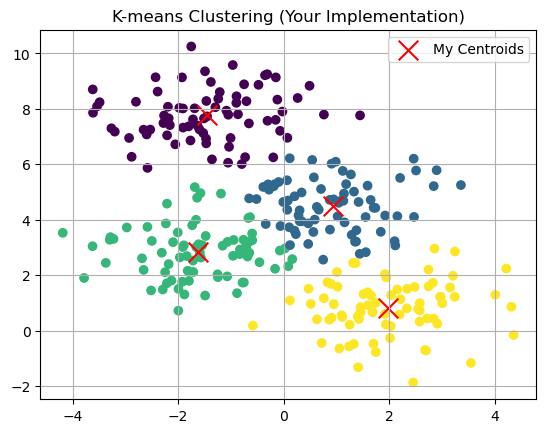

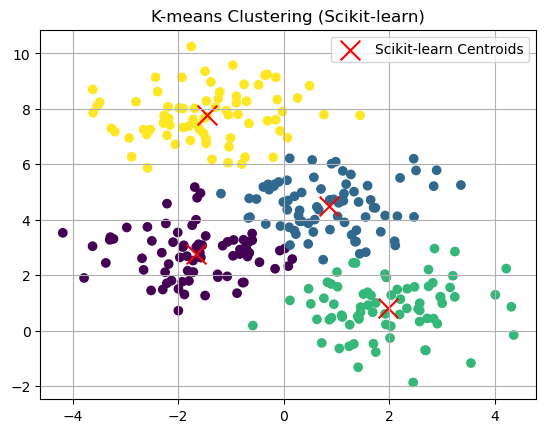

In [30]:
import matplotlib.pyplot as plt

# Plot data points with colors based on cluster assignments (your implementation)
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis')
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='red', marker='x', s=200, label='My Centroids')
plt.title('K-means Clustering (Your Implementation)')
plt.legend()
plt.grid()
plt.show()

# Plot data points with colors based on cluster assignments (scikit-learn)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Scikit-learn Centroids')
plt.title('K-means Clustering (Scikit-learn)')
plt.legend()
plt.grid()
plt.show()


In [34]:
import numpy as np

def rbf_kernel(x, y, gamma=1.0):
    # Radial Basis Function (RBF) kernel
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

def kernel_kmeans_numpy(X, n_clusters, max_iters=100, gamma=1.0):
    # Initialize cluster assignments randomly
    #np.random.seed(0)
    labels = np.random.choice(n_clusters, X.shape[0])

    for _ in range(max_iters):
        # Compute the kernel matrix
        K = np.zeros((X.shape[0], n_clusters))
        for i in range(X.shape[0]):
            for j in range(n_clusters):
                K[i, j] = rbf_kernel(X[i], X[labels == j].mean(axis=0), gamma)

        # Update cluster assignments
        new_labels = np.argmin(K, axis=1)

        # Check for convergence
        if np.all(labels == new_labels):
            break

        labels = new_labels

    return labels


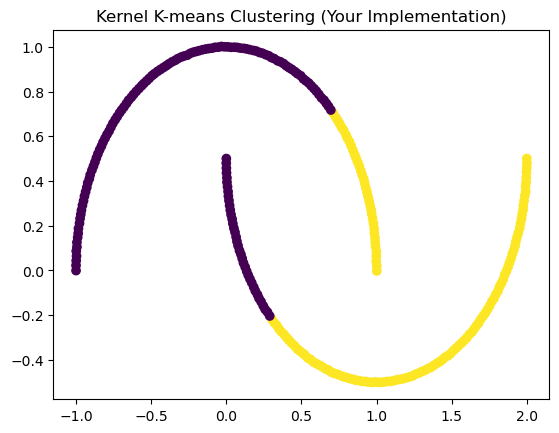

In [35]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data with two moon-shaped clusters
X, _ = make_moons(n_samples=300, noise=0.001, random_state=0)

# Apply your Kernel K-means implementation
n_clusters = 2
my_labels = kernel_kmeans_numpy(X, n_clusters, gamma=1)

# Plot data points with colors based on cluster assignments (your implementation)
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis')
plt.title('Kernel K-means Clustering (Your Implementation)')
plt.show()



C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


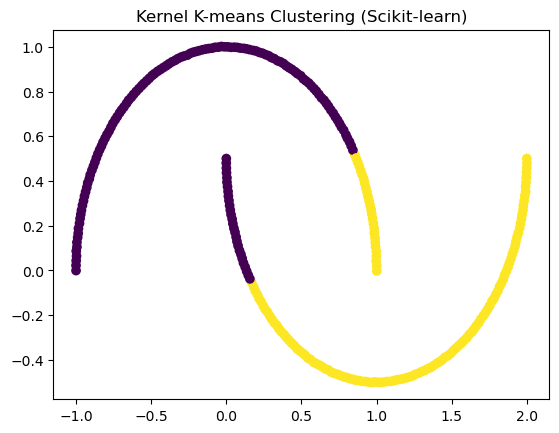

In [33]:
from sklearn.cluster import SpectralClustering

# Create a Spectral Clustering model using scikit-learn with RBF kernel
sklearn_labels = SpectralClustering(n_clusters=n_clusters, gamma=3, affinity='rbf', random_state=0).fit_predict(X)

# Plot data points with colors based on cluster assignments (scikit-learn)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis')
plt.title('Kernel K-means Clustering (Scikit-learn)')
plt.show()
